# Problem Statement - XYZ.com is an e-commerce company based in Argentina. 
Due to the covid crisis and lockdown XYZ.com is facing lots of issues from the dealer and the
shipment team. XYZ.com has lots of product data where various shipping and
sales details of each product have been mentioned. XYZ.com wants to find out
which of the products has been shipped and which of the products has been
canceled to reduce customer escalation. As a data-scientist, we have to train a
PCA model to visualize its higher-dimensional data and we have to train an
LDA(Linear Discriminant Analysis) model to predict which of the products has
been shipped and which of the products has been canceled.

In [28]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
# Load data from a CSV file into a DataFrame
df = pd.read_csv('D:\Post Graduate Program IIITH in Software Engg for Data Science\Part 2 IIITH Software Engg for Data Science\MongoDB PCA LDA\PCA LDA\sales_data_sample.csv')

# Display a sample of 5 rows
sample_rows = df.sample(n=5)
print(sample_rows)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
2591        10143               31      85.29               16  2643.99   
2323        10388               35     100.00                8  3918.95   
300         10212               39     100.00               16  4946.76   
1604        10273               22     100.00               11  2784.76   
2532        10397               32      80.55                5  2577.60   

           ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
2591  8/10/2003 0:00  Shipped       3         8     2003  ...   
2323   3/3/2005 0:00  Shipped       1         3     2005  ...   
300   1/16/2004 0:00  Shipped       1         1     2004  ...   
1604  7/21/2004 0:00  Shipped       3         7     2004  ...   
2532  3/28/2005 0:00  Shipped       1         3     2005  ...   

               ADDRESSLINE1  ADDRESSLINE2         CITY STATE POSTALCODE  \
2591      4575 Hillside Dr.           NaN  New Bedford    MA      50553   
2323    

In [9]:
# Check the shape of the DataFrame
print("Shape of the DataFrame is:", df.shape)

# This will print a tuple of (number of rows, number of columns)

# Get general information about the DataFrame
df_info = df.info()

Shape of the DataFrame is: (2823, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDR

In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Print the percentage of missing values for each column
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64


In [11]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Check if there are any duplicate rows
if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


In [13]:
def impute_most_frequent(df, columns):
    """
    Imputes the most frequent value for each specified column in the DataFrame.

    :param df: A pandas DataFrame containing the data.
    :param columns: A list of column names for which to impute missing values.
    :return: The DataFrame with missing values imputed.
    """
    for column in columns:
        if column in df.columns:
            # Calculate the most frequent value (mode) for the column
            most_frequent_value = df[column].mode()[0]
            
            # Replace missing values with the most frequent value
            df[column].fillna(most_frequent_value, inplace=True)
        else:
            print(f"Warning: {column} not in DataFrame")
    return df

# Specify the columns you want to impute
columns_to_impute = ['STATE', 'POSTALCODE', 'TERRITORY']

# Call the function to impute missing values
df_imputed = impute_most_frequent(df, columns_to_impute)

# Now 'df_imputed' will have the missing values of specified columns filled with the most frequent value


In [14]:
# Drop the specified columns
df_dropped = df.drop(['ADDRESSLINE2', 'ORDERDATE', 'PHONE'], axis=1)

# Now 'df_dropped' will be the DataFrame without the specified columns

In [15]:
# Convert STATUS column to 0 and 1 using numpy where
df['STATUS'] = np.where(df['STATUS'] == 'Shipped', 1, 0)

# The STATUS column will now have 1 for 'Shipped' and 0 for everything else

In [16]:
# Assign 'STATUS' column to a variable
label = df['STATUS']

# Drop the 'STATUS' column from the original DataFrame
df.drop('STATUS', axis=1, inplace=True)

# Convert the original DataFrame into dummy/one-hot encoded data
df_dummy = pd.get_dummies(df)

# Now 'df_dummy' will be the one-hot encoded DataFrame
# And 'label' will contain the values from the 'STATUS' column

In [17]:
# Assuming 'df_dummy' is your dummy-coded DataFrame from the previous steps
# and you want to scale this DataFrame.

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_scaled = scaler.fit_transform(df_dummy)

# The result is a NumPy array. To convert it back to a DataFrame:
df_scaled = pd.DataFrame(df_scaled, columns=df_dummy.columns)

# Now 'df_scaled' is the scaled version of your dummy-coded DataFrame

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the data and transform it
df_scaled = scaler.fit_transform(df_dummy)

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA on the scaled data and transform the data
df_reduced = pca.fit_transform(df_scaled)

# Convert the reduced data back into a DataFrame
df_reduced = pd.DataFrame(df_reduced, columns=['Principal Component 1', 'Principal Component 2'])

# Now 'df_reduced' is ready for visualization or as an input to a machine learning model.

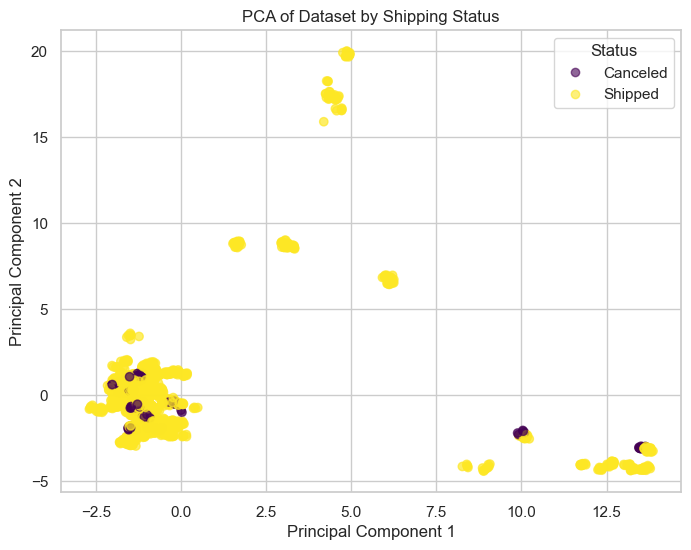

In [19]:
# Create a scatter plot of the two principal components
# Here we are assuming that 'df_reduced' has columns named 'Principal Component 1' and 'Principal Component 2'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_reduced['Principal Component 1'], df_reduced['Principal Component 2'], 
                      c=label,  # This assigns a color to each point based on its label
                      cmap='viridis',  # This is a color map. You can choose one that you like
                      alpha=0.7)  # This sets the transparency of the points

# Add a legend for the labels
# We generate handles and labels based on the unique values in your labels
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend_labels = ['Canceled', 'Shipped']  # You will need to replace these with your actual labels
plt.legend(handles, legend_labels, title="Status")

# Add title and labels to the plot
plt.title('PCA of Dataset by Shipping Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

# Write the intuitions about the scatter plot.
Interpreting a scatter plot after reducing the data to two principal components involves looking for patterns, clusters, and variations in the spread of the data points. The intuitions you can derive from such a plot typically revolve around the following aspects:

Clusters: One of the most immediate observations from a PCA scatter plot is the presence or absence of distinct clusters. Clusters can indicate groups of similar data points. If the labels in the plot show distinct clusters, it suggests that the data contains subsets with distinct characteristics that PCA has managed to separate along the principal components.

Spread of Data: The spread or dispersion of the data points along the principal components can tell you about the variance in your data. The first principal component is the direction of the highest variance, showing where the data is most spread out. The second principal component is perpendicular to the first and represents the second most variance.

Overlap: If there is a significant overlap between different labeled data points, it could suggest that those categories are not easily distinguishable based on the dataset provided, or that more components may be needed to achieve clear separation.

Outliers: Outliers will appear as points that are far removed from the rest of the data. Outliers might represent anomalies, errors, or simply rare events within the dataset.

Relative Positioning of Labels: How labels are positioned relative to each other can sometimes provide insights. For example, if all 'Shipped' labels (in case of a shipping status dataset) are on one side of the plot, and 'Canceled' labels are on the opposite side, this suggests a good separation between these two statuses.

Density: The density of the points (how close they are to each other) can also be informative. Denser regions of the plot suggest higher concentrations of similar data points, while sparse areas suggest fewer points with similar characteristics.

Trends: Sometimes, you might observe a trend or a pattern, such as a linear arrangement of points, which could suggest a correlation between the principal components and some of the original variables.

Remember, PCA is a linear dimensionality reduction technique, and while it is very effective in many cases, it might not capture complex, non-linear relationships within the data. It's also important to keep in mind that PCA reduces data by maximizing variance, not necessarily discriminability, so the components are not guaranteed to separate different classes in a classification problem optimally.

Lastly, PCA components are a linear combination of the original features, and while they are great for reducing dimensionality, the principal components themselves do not have an inherent meaning — they are abstract axes of maximum variance across the data. Any interpretation should be done in the context of the domain from which the data is derived and ideally with a good understanding of the underlying processes that generated the data.

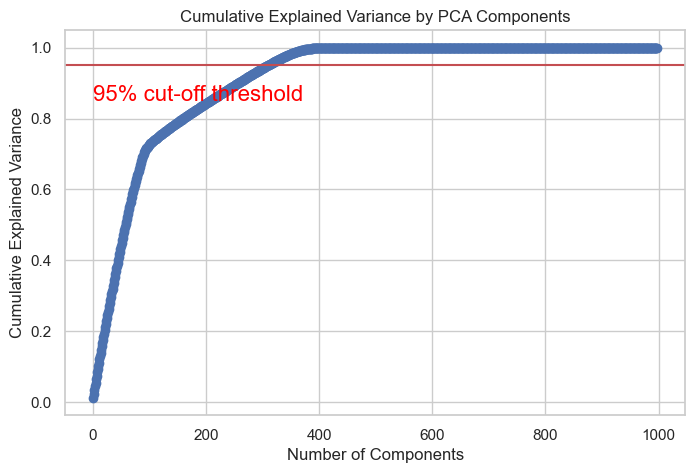

In [20]:
# Assuming 'df_scaled' is your scaled DataFrame

# Initialize PCA without specifying the number of components
# This will result in as many components as there are features in the dataset
pca = PCA()

# Fit PCA on the scaled data
pca.fit(df_scaled)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Optional: Add a horizontal line to denote some threshold of explained variance, for example, 95%
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

plt.show()

In [21]:
# Given that 'cumulative_explained_variance' is the cumulative sum of explained variances
# Find the index where the cumulative explained variance exceeds 0.90
# Then add 1 to the index to get the number of components, since index is 0-based
num_components_90_var = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1

print(f"Number of components explaining 90% variance: {num_components_90_var}")

Number of components explaining 90% variance: 257


In [24]:
# Assume X is your feature set and y is the corresponding label set

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LDA - by default, LDA will reduce the data to one fewer than the number of classes
lda = LDA()

# Fit LDA on the training data - note that unlike PCA, LDA requires the class labels
lda.fit(X_train, y_train)

# Transform both the training and test sets
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Now, X_train_lda and X_test_lda are the reduced feature sets for further processing or classification

NameError: name 'X' is not defined

In [25]:
# Assuming `X` are your features and `y` are your labels

# Split the data into an 80% training set and a 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LDA with one component
lda = LDA(n_components=1)

# Fit LDA on the training data and transform it
X_train_lda = lda.fit_transform(X_train, y_train)

# Only transform the test data (do not fit the LDA model to the test data)
X_test_lda = lda.transform(X_test)

# At this point, X_train_lda and X_test_lda contain the transformed features
# for the training and test sets, respectively

NameError: name 'X' is not defined

In [29]:
# Assuming you have already created X_train_lda and X_test_lda from the previous steps
# and y_train, y_test are your training and test labels respectively.

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the RandomForestClassifier on the LDA-transformed training data
rf_classifier.fit(X_train_lda, y_train)

# Predict the labels of the LDA-transformed test data
y_pred = rf_classifier.predict(X_test_lda)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy score: {accuracy:.4f}")

NameError: name 'X_train_lda' is not defined